In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('consumer_complaints.csv')
df.head()

C:\Users\bhava\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [3]:
df.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [4]:
df["date_received"]= pd.to_datetime(df["date_received"])
df["date_sent_to_company"]= pd.to_datetime(df["date_sent_to_company"])


In [5]:
df.dtypes

date_received                   datetime64[ns]
product                                 object
sub_product                             object
issue                                   object
sub_issue                               object
consumer_complaint_narrative            object
company_public_response                 object
company                                 object
state                                   object
zipcode                                 object
tags                                    object
consumer_consent_provided               object
submitted_via                           object
date_sent_to_company            datetime64[ns]
company_response_to_consumer            object
timely_response                         object
consumer_disputed?                      object
complaint_id                             int64
dtype: object

In [6]:
df.isnull().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

In [7]:
df.shape[0]

555957

In [8]:
df.shape

(555957, 18)

In [9]:
len(df['consumer_complaint_narrative'].value_counts())

65646

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_received                 555957 non-null  datetime64[ns]
 1   product                       555957 non-null  object        
 2   sub_product                   397635 non-null  object        
 3   issue                         555957 non-null  object        
 4   sub_issue                     212622 non-null  object        
 5   consumer_complaint_narrative  66806 non-null   object        
 6   company_public_response       85124 non-null   object        
 7   company                       555957 non-null  object        
 8   state                         551070 non-null  object        
 9   zipcode                       551452 non-null  object        
 10  tags                          77959 non-null   object        
 11  consumer_cons

In [10]:
missing_values = df.isnull().sum()


total = df.isnull().sum().sort_values(ascending=False)


percent = ((df.isnull().sum()/df.shape[0])*100)


percent = percent.sort_values(ascending=False)


missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data['Type'] = df[missing_data.index].dtypes


missing_data

,Total,Percent,Type
consumer_complaint_narrative,489151,87.983603,object
tags,477998,85.977513,object
company_public_response,470833,84.688744,object
consumer_consent_provided,432499,77.793606,object
sub_issue,343335,61.755675,object
sub_product,158322,28.477382,object
state,4887,0.879025,object
zipcode,4505,0.810314,object
product,0,0.000000,object
issue,0,0.000000,object


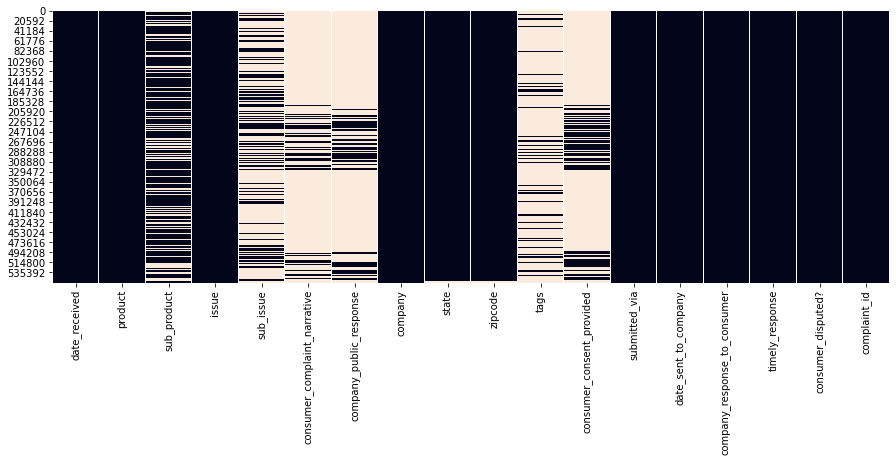

In [11]:

%matplotlib inline


plt.rcParams["figure.figsize"]=[15,5]


sns.heatmap(df.isnull(), cbar = False)


plt.show()

Here sub_product, sub_issue, consumer_complaint_narrartive, company_public_response,tags,consumer_consent_provided
has maximum null values hence rest all have non null values

# Handling Missing values

Since consumer_complaint_narrative,tags,company_public_response,consumer_consent_provided,sub_issue

Since these datas have more than 80% null values hence we are dropping the values

For a variable,if the data has 60-70 percent missingvalues we should consider the dropping the variable

In [12]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,2013-08-30,Closed with explanation,Yes,Yes,510326
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,2013-08-30,Closed with explanation,Yes,Yes,511067


In [11]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [13]:
x=df['sub_product'].value_counts()
x

Other mortgage                            74319
Conventional fixed mortgage               57182
Checking account                          44369
Other (i.e. phone, health club, etc.)     29617
I do not know                             21634
Conventional adjustable mortgage (ARM)    20941
Credit card                               20825
FHA mortgage                              19152
Non-federal student loan                  17969
Medical                                   13297
Vehicle loan                              12168
Other bank product/service                10895
Payday loan                                9684
Home equity loan or line of credit         8944
Installment loan                           5279
Savings account                            3996
VA mortgage                                3735
Mortgage                                   3433
(CD) Certificate of deposit                2839
Auto                                       2523
International money transfer            

In [14]:
df.isnull().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

In [18]:
df1=df[['date_received','product','sub_product','issue','company',
       'state', 'zipcode','submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response','consumer_disputed?','complaint_id', 'day_diff']]
df1.head()

,date_received,product,sub_product,issue,company,state,zipcode,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,day_diff
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074,4 days
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080,4 days
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Wells Fargo & Company,NY,11764,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473,19 days
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,"Navient Solutions, Inc.",MD,21402,Email,2013-08-30,Closed with explanation,Yes,Yes,510326,0 days
4,2013-08-30,Debt collection,Credit card,False statements or representation,Resurgent Capital Services L.P.,GA,30106,Web,2013-08-30,Closed with explanation,Yes,Yes,511067,0 days


In [38]:
df1.isnull().sum()

date_received                      0
product                            0
sub_product                        0
issue                              0
company                            0
state                              0
zipcode                         4505
submitted_via                      0
date_sent_to_company               0
company_response_to_consumer       0
timely_response                    0
consumer_disputed?                 0
complaint_id                       0
day_diff                           0
Date                               0
Year                               0
Month                              0
dtype: int64

In [ ]:
We are not using zipcode we will treat missing values if its used in visulization further

In [25]:
df1.shape

(555957, 14)

In [81]:
df[['date_received','product','sub_product','issue','sub_issue','company',
       'state', 'zipcode','submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response','consumer_disputed?','complaint_id', 'day_diff']]
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,day_diff
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074,4 days
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080,4 days
2,2013-08-30,Credit reporting,Other mortgage,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473,19 days
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,2013-08-30,Closed with explanation,Yes,Yes,510326,0 days
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,2013-08-30,Closed with explanation,Yes,Yes,511067,0 days


In [16]:
df['day_diff'] = df['date_sent_to_company'] - df['date_received']
df

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,day_diff
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074,4 days
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080,4 days
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473,19 days
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,2013-08-30,Closed with explanation,Yes,Yes,510326,0 days
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,2013-08-30,Closed with explanation,Yes,Yes,511067,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,2014-07-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,2014-07-07,Closed with explanation,Yes,No,919529,6 days
555953,2014-07-01,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,2014-07-23,Closed with explanation,No,No,918447,22 days
555954,2012-07-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,2013-11-18,Closed with explanation,Yes,No,114550,496 days
555955,2015-04-14,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,2015-04-14,Untimely response,No,No,1329963,0 days


In [17]:
len(df['company'].value_counts())

3605

# Consumer Complaints Bivariate Analysis

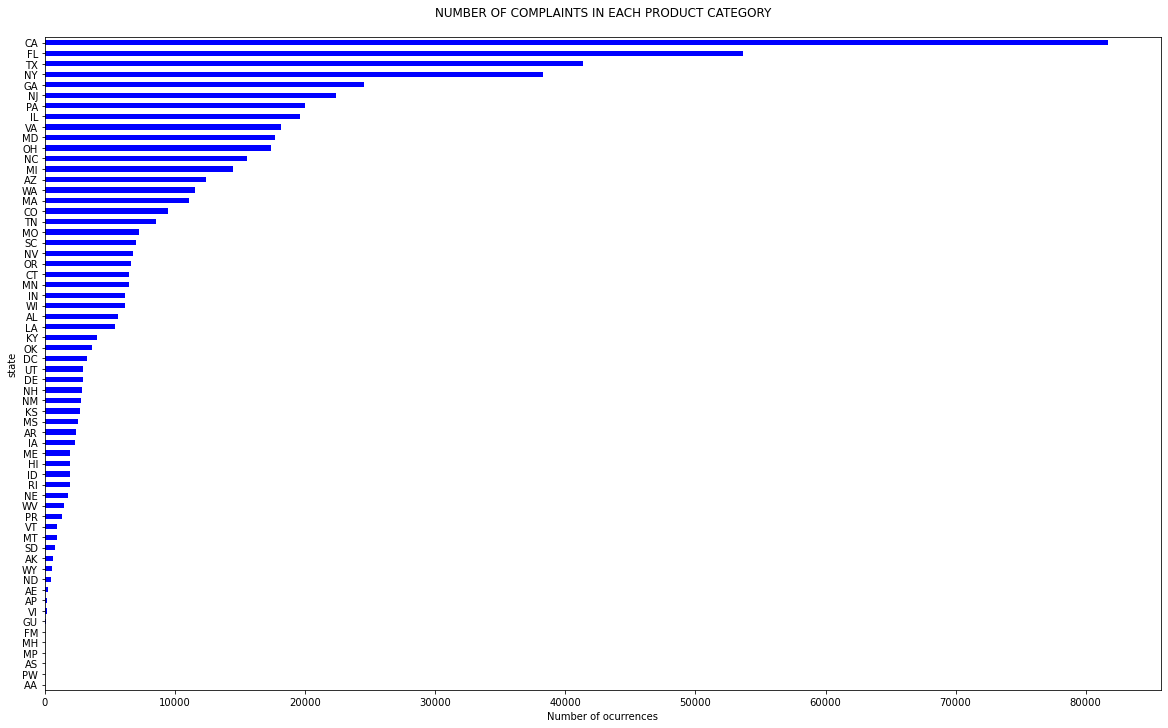

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,12))
df1.groupby(['state'])['complaint_id'].count().sort_values().plot.barh(
    ylim=0, color='blue', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

 CA has highest no. of complaints for product category

In [87]:
companies = df1['company'].value_counts().head(10)

<AxesSubplot:title={'center':'Top 10 Companies to Receive Complaints'}>

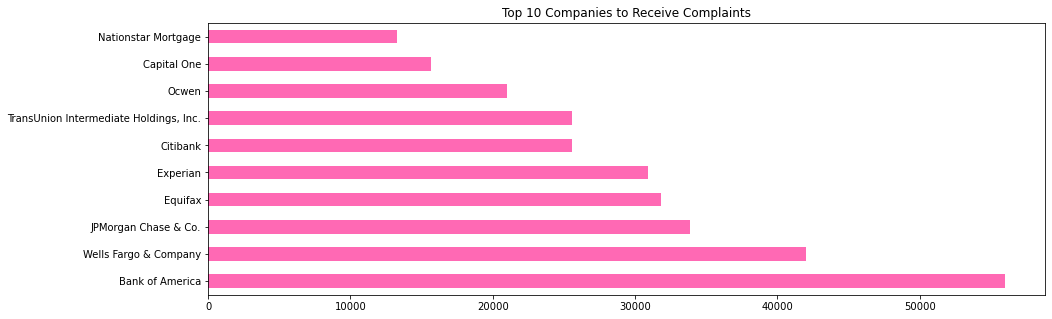

In [88]:
companies.plot(kind ='barh', color = 'hotpink', title='Top 10 Companies to Receive Complaints')

Bank of America received the most consumer complaints compared to NationStar Mortgage who received the least.

In [89]:
x=pd.DataFrame(df1.groupby(['company'])['day_diff'].count().sort_values(ascending=False))
x.head()

,day_diff
company,
Bank of America,55998
Wells Fargo & Company,42024
JPMorgan Chase & Co.,33881
Equifax,31828
Experian,30905


For the date difference between companies Bank of America has highest count among all 

In [91]:
response = df1['company_response_to_consumer'].value_counts()

<AxesSubplot:title={'center':'Company Response'}>

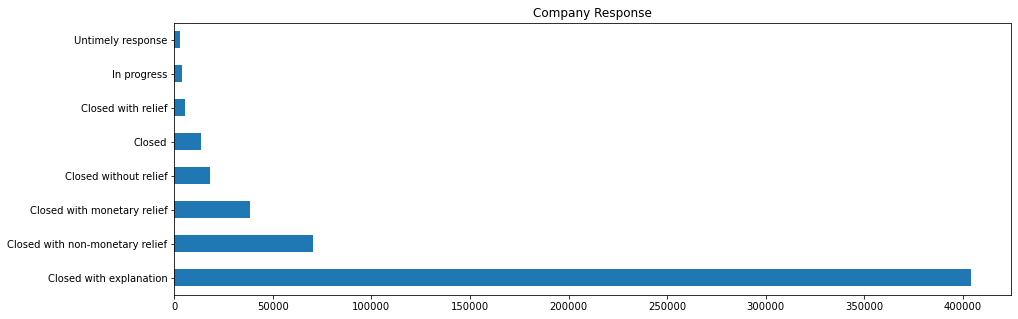

In [93]:
response.plot(kind = 'barh', title='Company Response')


Seeing as the most common company response is "Closed with explanation" it is evident that the company's could benefit with more clear and concise literature, which could cut back on overall company complaints.

<AxesSubplot:title={'center':'Company Response to the Customer'}, xlabel='timely_response'>

<Figure size 1440x720 with 0 Axes>

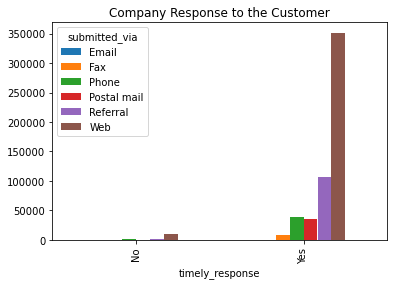

In [36]:
plt.figure(figsize=(20,10))
pd.crosstab(df1['timely_response'],df1['submitted_via']).plot(kind='bar',title='Company Response to the Customer')


Seeing from figure we can see that company response to customer is maximum through web

<AxesSubplot:title={'center':'Top 10 issues'}>

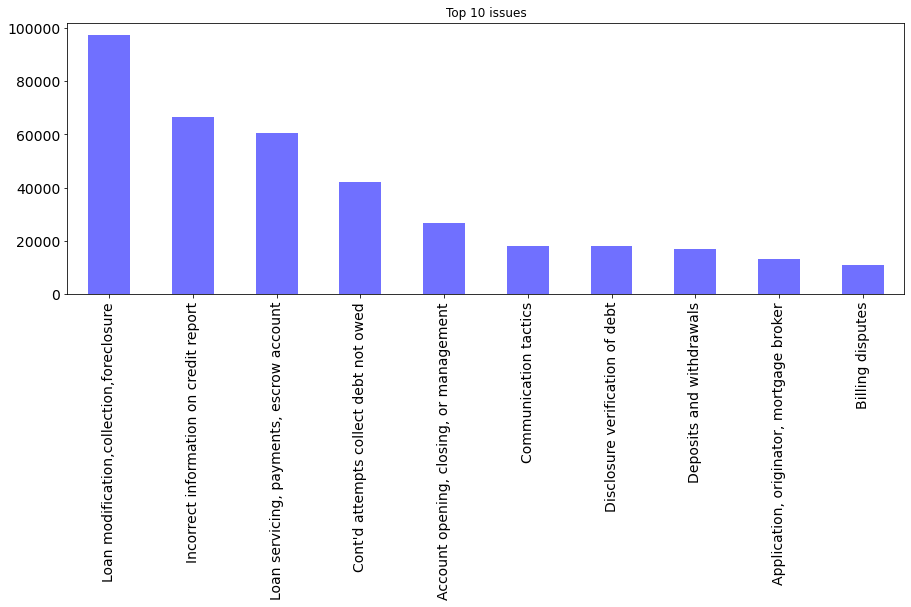

In [27]:
df1['issue'].str.strip("'").value_counts()[0:10].plot(kind='bar',title='Top 10 issues',fontsize=14,color='#7070FF')

Loan_modification collection has the highest issue among all issues

In [29]:
test = pd.crosstab(df['timely_response'],df['consumer_disputed?'])
cm = sns.light_palette("blue", as_cmap=True)

test.style.background_gradient(cmap=cm)

consumer_disputed?,No,Yes
timely_response,,
No,12335,1713
Yes,431488,110421


Since the timely resolution of consumer disputed have been highest for when the response of consumer disputed and response time is yes for both

In [32]:
from datetime import datetime

In [37]:
df["DATE"] = pd.to_datetime(df["date_received"]) # seting the column as pandas datetime
df["YEAR"] = df['DATE'].dt.year # extracting year
df["MONTH"] = df["DATE"].dt.month # extracting month
df["YEAR_MONTH"] = df.YEAR.astype(str).str.cat(df.MONTH.astype(str), sep='-')

<AxesSubplot:title={'center':'Number of Complaints per Month'}>

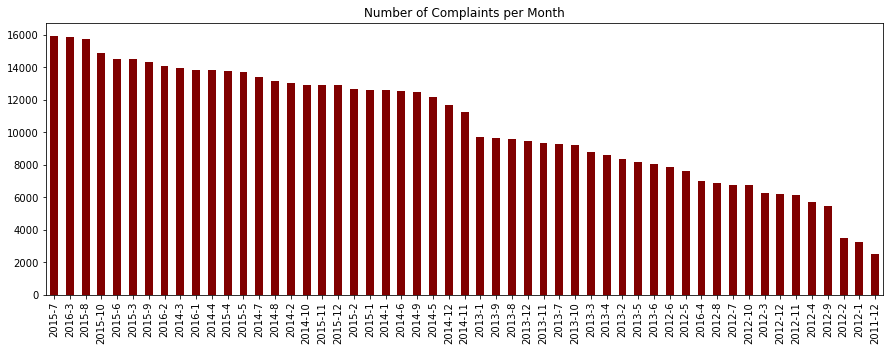

In [39]:
df["YEAR_MONTH"].value_counts().plot(kind='bar',color='#800000',title='Number of Complaints per Month')

Highest complaints are there in July 2015

In [94]:
file_name = 'Consumer_complaint.xlsx'
  

df1.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')


DataFrame is written to Excel File successfully.
